In [6]:
import numpy as np
import pandas as pd
from pprint import pprint

class one_shot:
    def __init__(self, symbol, side, size, price, timestamp):
        self._symbol = symbol
        self._side = side
        self._size = size
        self._price = price
        self._timestamp = timestamp
    @property
    def symbol(self):
        return self._symbol
    @property
    def side(self):
        return self._side
    @property
    def size(self):
        return self._size
    @property
    def price(self):
        return self._price
    @property
    def timestamp(self):
        return self._timestamp
    
class BTCenv:
    def __init__(self, df: pd.DataFrame):
        self._shots = []
        for _, row in df.iterrows():
            self._shots.append(one_shot(row['symbol'], row['side'], row['size'], row['price'], row['timestamp']))

    @property
    def shots(self):
        return self._shots

    @shots.setter
    def shots(self, value):
        self._shots = value


In [8]:
import pandas as pd

df = pd.read_csv(r"/workspace/gmo/gmo_data/BTC_2022/BTC_2022_8.csv")
df.columns

env = BTCenv(df)
shots = env.shots


In [18]:
i = 0
price_history_length = 10
for shot in shots[i:i+price_history_length]:
    print(shot.symbol, shot.side, shot.size, shot.price, shot.timestamp)

BTC SELL 0.0001 3110000.0 2022-08-01 00:00:01.418
BTC SELL 0.0003 3110000.0 2022-08-01 00:00:01.418
BTC SELL 0.0001 3110000.0 2022-08-01 00:00:01.418
BTC BUY 0.0001 3110097.0 2022-08-01 00:00:06.468
BTC SELL 0.0001 3108810.0 2022-08-01 00:00:17.592
BTC SELL 0.01 3108800.0 2022-08-01 00:00:18.928
BTC SELL 0.0004 3107814.0 2022-08-01 00:00:20.475
BTC SELL 0.001 3107244.0 2022-08-01 00:00:25.395
BTC SELL 0.01 3107572.0 2022-08-01 00:00:36.412
BTC BUY 0.0643 3107720.0 2022-08-01 00:00:40.317


In [22]:
sample_shots = shots[::-1]

i = 0
price_history_length = 10
for shot in sample_shots[i:i+price_history_length]:
    print(f'{shot.symbol}, {shot.side}, {shot.size}, {shot.price}, {shot.timestamp}')

BTC, BUY, 0.0001, 2796079.0, 2022-08-31 23:58:37.960
BTC, BUY, 0.0001, 2795591.0, 2022-08-31 23:58:25.558
BTC, BUY, 0.01, 2796271.0, 2022-08-31 23:57:48.526
BTC, BUY, 0.0045, 2796894.0, 2022-08-31 23:57:25.256
BTC, BUY, 0.0001, 2796836.0, 2022-08-31 23:56:08.597
BTC, BUY, 0.0395, 2797223.0, 2022-08-31 23:56:00.424
BTC, BUY, 0.0055, 2795864.0, 2022-08-31 23:56:00.424
BTC, BUY, 0.0001, 2795864.0, 2022-08-31 23:54:45.059
BTC, SELL, 0.087, 2795340.0, 2022-08-31 23:54:35.081
BTC, SELL, 0.0125, 2795440.0, 2022-08-31 23:54:35.081


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from env_skeleton2 import one_shot, BTCenv
import pandas as pdc

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size=128):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)  # Output is a single scalar value (signed value)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the neural network with input size of 20 (10 shots * 2 values per shot)
nn_model = SimpleNN(input_size=20)
nn_model



SimpleNN(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

In [35]:
input_list = []
i = 5
history_length = 10
for shot in sample_shots[i:i+history_length]:
    if shot.side == 'SELL':
        size = shot.size * -1
    else:
        size = shot.size
    input_list.append(size)
    input_list.append(shot.price)

input_tensor = torch.tensor(input_list).float().unsqueeze(0)
print(input_tensor)

nn_model(input_tensor)

tensor([[ 3.9500e-02,  2.7972e+06,  5.5000e-03,  2.7959e+06,  1.0000e-04,
          2.7959e+06, -8.7000e-02,  2.7953e+06, -1.2500e-02,  2.7954e+06,
         -5.0000e-04,  2.7958e+06,  1.0000e-04,  2.7956e+06,  1.0000e-04,
          2.7949e+06, -1.7000e-03,  2.7942e+06,  1.0000e-04,  2.7936e+06]])


tensor([[-138306.2969]], grad_fn=<AddmmBackward0>)

In [56]:
import pandas as pd
pd.set_option("display.max_rows", None)

df = pd.read_csv('/workspace/gmo_drl/2023_trading_report.csv')
# df = df[:1000]
df.columns
# df[:63].to_csv('2023_trading_report_sample.csv', index = False)
df = df[['日時', '精算区分', '日本円受渡金額', '注文ID', '銘柄名', 
       '売買区分', '執行条件', '約定数量', '約定レート', '約定金額', '注文手数料', '入出金区分',
       '入出金金額']]

In [63]:
df[(df['注文手数料'] < 0) & (df['売買区分'] == '売')]

,日時,精算区分,日本円受渡金額,注文ID,銘柄名,売買区分,執行条件,約定数量,約定レート,約定金額,注文手数料,入出金区分,入出金金額
44,2023/05/02 01:56,取引所現物取引,11734,3.486030e+09,BTC,売,指値,0.0030,3911000.0,11733.0,-1.0,NaN,NaN
172,2023/06/07 04:24,取引所現物取引,13126,3.571446e+09,BTC,売,指値,0.0035,3750000.0,13125.0,-1.0,NaN,NaN
382,2023/06/26 20:24,取引所現物取引,13035,3.621579e+09,BTC,売,指値,0.0030,4344750.0,13034.0,-1.0,NaN,NaN
435,2023/06/27 20:47,取引所現物取引,22011,3.624263e+09,BTC,売,指値,0.0050,4401999.0,22009.0,-2.0,NaN,NaN
452,2023/06/30 22:52,取引所現物取引,10838,3.632981e+09,BTC,売,指値,0.0025,4335000.0,10837.0,-1.0,NaN,NaN
455,2023/07/01 01:42,取引所現物取引,10971,3.632952e+09,BTC,売,指値,0.0025,4388000.0,10970.0,-1.0,NaN,NaN
457,2023/07/01 20:47,取引所現物取引,10585,3.634514e+09,BTC,売,指値,0.0024,4410000.0,10584.0,-1.0,NaN,NaN
458,2023/07/01 20:48,取引所現物取引,15877,3.634514e+09,BTC,売,指値,0.0036,4410000.0,15876.0,-1.0,NaN,NaN
480,2023/07/03 07:27,取引所現物取引,39866,3.638356e+09,BTC,売,指値,0.0090,4429250.0,39863.0,-3.0,NaN,NaN
516,2023/07/13 10:04,取引所現物取引,82493,3.663160e+09,BTC,売,指値,0.0195,4230000.0,82485.0,-8.0,NaN,NaN


In [60]:
df[(df['日本円受渡金額'] + df['注文手数料'] == df['約定金額']) & (df['注文手数料'] != 0)]

,日時,精算区分,日本円受渡金額,注文ID,銘柄名,売買区分,執行条件,約定数量,約定レート,約定金額,注文手数料,入出金区分,入出金金額
42,2023/05/02 01:44,取引所現物取引,1555,3.486187e+09,BTC,売,成行,0.0004,3891300.0,1556.0,1.0,NaN,NaN
43,2023/05/02 01:46,取引所現物取引,1556,3.486203e+09,BTC,売,指値,0.0004,3894656.0,1557.0,1.0,NaN,NaN
44,2023/05/02 01:56,取引所現物取引,11734,3.486030e+09,BTC,売,指値,0.0030,3911000.0,11733.0,-1.0,NaN,NaN
52,2023/05/02 06:01,取引所現物取引,7645,3.486735e+09,BTC,売,成行,0.0020,3824901.0,7649.0,4.0,NaN,NaN
53,2023/05/02 06:02,取引所現物取引,1914,3.486735e+09,BTC,売,成行,0.0005,3830001.0,1915.0,1.0,NaN,NaN
55,2023/05/02 06:03,取引所現物取引,1914,3.486735e+09,BTC,売,成行,0.0005,3830101.0,1915.0,1.0,NaN,NaN
59,2023/05/02 08:45,取引所現物取引,1937,3.487042e+09,BTC,売,成行,0.0005,3877600.0,1938.0,1.0,NaN,NaN
63,2023/05/04 11:12,取引所現物取引,3920,3.492843e+09,BTC,売,成行,0.0010,3922001.0,3922.0,2.0,NaN,NaN
65,2023/05/04 14:01,取引所現物取引,3921,3.493123e+09,BTC,売,成行,0.0010,3923359.0,3923.0,2.0,NaN,NaN
66,2023/05/04 14:02,取引所現物取引,1960,3.493123e+09,BTC,売,成行,0.0005,3923359.0,1961.0,1.0,NaN,NaN


In [65]:
df['注文手数料'].sum()

630.0

In [72]:
aa = []
for row in df.iterrows():
    # print(row)
    yen = row[1]['日本円受渡金額'] 
    tesu = row[1]['約定金額']
    if yen < 0:
        aa.append(yen * -1 - tesu)
    else:
        aa.append(yen - tesu)

print(aa)

[nan, nan, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, nan, 0.0, 0.0, 2.0, 1.0, nan, 2.0, 0.0, 0.0, -1.0, -1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.0, -1.0, nan, -1.0, 0.0, 0.0, 1.0, -1.0, 2.0, 0.0, nan, -2.0, 0.0, -2.0, -1.0, 2.0, -2.0, -2.0, -1.0, 4.0, 4.0, -1.0, -4.0, -2.0, -2.0, 0.0, 2.0, -6.0, 4.0, 3.0, 1.0, -4.0, 4.0, 3.0, 1.0, 0.0, 2.0, -1.0, -7.0, -2.0, -1.0, 2.0, 2.0, 2.0, -2.0, -2.0, -2.0, 4.0, -4.0, 2.0, 1.0, 2.0, 4.0, -4.0, -2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, -4.0, 2.0, 1.0, 0.0, 1.0, 1.0, nan, -6.0, -6.0, -4.0, -3.0, 6.0, 0.0, -2.0, -2.0, -1.0, 0.0, 0.0, -1.0, -3.0, 3.0, 0.0, nan, 2.0, 2.0, 0.0, -2.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, -4.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, -2.0, -1.0, 0.0, 1.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 6.0, 4.0, 4.0, 1.0, -5.0, 2.0, 0.0, -2.0, 0.0, 4.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, nan, -3.0, 1.0, -2.0, 0.0

In [74]:
df['注文手数料2'] = aa

In [80]:
df[['日時', '精算区分', '日本円受渡金額', '注文ID', '銘柄名', '売買区分', '執行条件', '約定数量', '約定レート',
       '約定金額', '注文手数料', '注文手数料2', '入出金区分', '入出金金額']]
df['注文手数料2'].sum()

116.0

# total

In [269]:
sample_df = pd.read_csv("/workspace/gmo_drl/2023_trading_report.csv")

# Multiply the "約定手数料" column by -1 for rows where "売買区分" is '売'
sample_df.loc[sample_df['売買区分'] == '売', '約定数量'] *= -1

small_set0 = ['日時', '精算区分', '日本円受渡金額', '銘柄名', '売買区分', '執行条件', '約定数量', '約定レート',
       '約定金額', '注文手数料']

small_set = ['日時', '精算区分', '日本円受渡金額', '銘柄名', '売買区分', '執行条件', '約定数量', '約定レート',
       '約定金額', 'total_jpy', 'total_btc', 'have_jpy', 'have_btc']

sample_df[small_set0].head(20)


,日時,精算区分,日本円受渡金額,銘柄名,売買区分,執行条件,約定数量,約定レート,約定金額,注文手数料
0,2023/04/09 20:27,日本円入出金,5000,JPY,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/04/30 16:33,日本円入出金,10000,JPY,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/04/30 17:34,取引所現物取引,-401,BTC,買,成行,0.0001,4000000.0,400.0,1.0
3,2023/04/30 17:46,取引所現物取引,-400,BTC,買,指値,0.0001,3998400.0,400.0,0.0
4,2023/04/30 18:25,取引所現物取引,-798,BTC,買,指値,0.0002,3990000.0,798.0,0.0
5,2023/04/30 19:47,取引所現物取引,-799,BTC,買,指値,0.0002,3991900.0,799.0,0.0
6,2023/05/01 11:14,取引所現物取引,-1181,BTC,買,成行,0.0003,3930500.0,1180.0,1.0
7,2023/05/01 11:24,取引所現物取引,-394,BTC,買,指値,0.0001,3930200.0,394.0,0.0
8,2023/05/01 11:28,取引所現物取引,-1962,BTC,買,指値,0.0005,3923500.0,1962.0,0.0
9,2023/05/01 11:47,取引所現物取引,1964,BTC,売,指値,-0.0005,3929950.0,1964.0,0.0


In [271]:
def add_total(df_window ,first_jpy, first_btc):

    total_jpys = []
    total_btcs = []
    have_jpys = []
    have_btcs = []

    btc = first_btc
    jpy = first_jpy

    for row in df_window.iterrows():
        row = row[1]
        if row['精算区分'] == '取引所現物取引':
            if row['銘柄名'] == 'BTC':
                btc += row['約定数量']
                jpy += row['日本円受渡金額']
                now_rate = row['約定レート']
                have_jpys.append(jpy)
                have_btcs.append(btc)
                total_jpys.append(jpy + btc*now_rate)
                total_btcs.append(jpy/now_rate + btc)
        else:
            have_jpys.append(None)
            have_btcs.append(None)
            total_jpys.append(None)
            total_btcs.append(None)

    df_window['have_jpy'] = have_jpys
    df_window['have_btc'] = have_btcs
    df_window['total_jpy'] = total_jpys
    df_window['total_btc'] = total_btcs
    
    return df_window

sample_df = add_total(sample_df, 0, 0)

sample_df[small_set][-50:-1]
sample_df[small_set][:50]


,日時,精算区分,日本円受渡金額,銘柄名,売買区分,執行条件,約定数量,約定レート,約定金額,total_jpy,total_btc,have_jpy,have_btc
0,2023/04/09 20:27,日本円入出金,5000,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/04/30 16:33,日本円入出金,10000,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/04/30 17:34,取引所現物取引,-401,BTC,買,成行,0.0001,4000000.0,400.0,-1.0000,-2.500000e-07,-401.0,0.0001
3,2023/04/30 17:46,取引所現物取引,-400,BTC,買,指値,0.0001,3998400.0,400.0,-1.3200,-3.301321e-07,-801.0,0.0002
4,2023/04/30 18:25,取引所現物取引,-798,BTC,買,指値,0.0002,3990000.0,798.0,-3.0000,-7.518797e-07,-1599.0,0.0004
5,2023/04/30 19:47,取引所現物取引,-799,BTC,買,指値,0.0002,3991900.0,799.0,-2.8600,-7.164508e-07,-2398.0,0.0006
6,2023/05/01 11:14,取引所現物取引,-1181,BTC,買,成行,0.0003,3930500.0,1180.0,-41.5500,-1.057117e-05,-3579.0,0.0009
7,2023/05/01 11:24,取引所現物取引,-394,BTC,買,指値,0.0001,3930200.0,394.0,-42.8000,-1.089003e-05,-3973.0,0.0010
8,2023/05/01 11:28,取引所現物取引,-1962,BTC,買,指値,0.0005,3923500.0,1962.0,-49.7500,-1.268001e-05,-5935.0,0.0015
9,2023/05/01 11:47,取引所現物取引,1964,BTC,売,指値,-0.0005,3929950.0,1964.0,-41.0500,-1.044543e-05,-3971.0,0.0010


In [274]:
n = 10

trade_df = sample_df[sample_df['精算区分'] == '取引所現物取引']
trade_df = trade_df.reset_index(drop=True)
for i in range(len(trade_df) - n):
    if i > 15:
        break
    rows = trade_df[small_set].iloc[i:i+n]
    win = pd.DataFrame(rows)
    win0 = win.reset_index(drop=True)

    win0.loc[0,'日本円受渡金額'] = 0
    # win0.loc[0,'注文手数料'] = 0
    win0.loc[0,'約定数量'] = 0
    win0.loc[0,'約定金額'] = 0
    # win0.loc[0,'売買区分'] = None
    win0.loc[0,'執行条件'] = None


    first_jpy = win0.iloc[0]['have_jpy']
    first_btc = win0.iloc[0]['have_btc']

    win0.drop(['total_btc','total_jpy','have_jpy','have_btc'], axis=1)
    win.drop(['total_btc','total_jpy','have_jpy','have_btc'], axis=1)

    win0_total = add_total(win0, first_btc=first_btc, first_jpy=first_jpy)
    win_total = add_total(win, first_btc=first_btc, first_jpy=first_jpy)

print(first_jpy,first_btc)
win0_total



-7488.0 0.0019000000000000006


,日時,精算区分,日本円受渡金額,銘柄名,売買区分,執行条件,約定数量,約定レート,約定金額,total_jpy,total_btc,have_jpy,have_btc
0,2023/05/01 14:14,取引所現物取引,0,BTC,売,None,0.0000,3930710.0,0.0,-19.6510,-0.000005,-7488.0,0.0019
1,2023/05/01 14:36,取引所現物取引,-1176,BTC,買,指値,0.0003,3918100.0,1176.0,-44.1800,-0.000011,-8664.0,0.0022
2,2023/05/01 15:49,取引所現物取引,2752,BTC,売,指値,-0.0007,3931500.0,2752.0,-14.7500,-0.000004,-5912.0,0.0015
3,2023/05/01 16:05,取引所現物取引,3933,BTC,売,指値,-0.0010,3933500.0,3933.0,-12.2500,-0.000003,-1979.0,0.0005
4,2023/05/01 16:06,取引所現物取引,787,BTC,売,指値,-0.0002,3939999.0,787.0,-10.0003,-0.000003,-1192.0,0.0003
5,2023/05/01 16:06,取引所現物取引,393,BTC,売,指値,-0.0001,3939999.0,393.0,-11.0002,-0.000003,-799.0,0.0002
6,2023/05/01 18:43,取引所現物取引,-1961,BTC,買,指値,0.0005,3920500.0,1961.0,-15.6500,-0.000004,-2760.0,0.0007
7,2023/05/01 18:44,取引所現物取引,-3918,BTC,買,指値,0.0010,3918000.0,3918.0,-17.4000,-0.000004,-6678.0,0.0017
8,2023/05/01 21:02,取引所現物取引,-2346,BTC,買,指値,0.0006,3910000.0,2346.0,-31.0000,-0.000008,-9024.0,0.0023
9,2023/05/01 21:02,取引所現物取引,-3914,BTC,買,指値,0.0010,3913500.0,3914.0,-23.4500,-0.000006,-12938.0,0.0033


In [275]:
win_total


,日時,精算区分,日本円受渡金額,銘柄名,売買区分,執行条件,約定数量,約定レート,約定金額,total_jpy,total_btc,have_jpy,have_btc
15,2023/05/01 14:14,取引所現物取引,1179,BTC,売,指値,-0.0003,3930710.0,1179.0,-19.8640,-0.000005,-6309.0,1.600000e-03
16,2023/05/01 14:36,取引所現物取引,-1176,BTC,買,指値,0.0003,3918100.0,1176.0,-40.6100,-0.000010,-7485.0,1.900000e-03
17,2023/05/01 15:49,取引所現物取引,2752,BTC,売,指値,-0.0007,3931500.0,2752.0,-15.2000,-0.000004,-4733.0,1.200000e-03
18,2023/05/01 16:05,取引所現物取引,3933,BTC,売,指値,-0.0010,3933500.0,3933.0,-13.3000,-0.000003,-800.0,2.000000e-04
19,2023/05/01 16:06,取引所現物取引,787,BTC,売,指値,-0.0002,3939999.0,787.0,-13.0000,-0.000003,-13.0,5.149960e-19
20,2023/05/01 16:06,取引所現物取引,393,BTC,売,指値,-0.0001,3939999.0,393.0,-13.9999,-0.000004,380.0,-1.000000e-04
21,2023/05/01 18:43,取引所現物取引,-1961,BTC,買,指値,0.0005,3920500.0,1961.0,-12.8000,-0.000003,-1581.0,4.000000e-04
22,2023/05/01 18:44,取引所現物取引,-3918,BTC,買,指値,0.0010,3918000.0,3918.0,-13.8000,-0.000004,-5499.0,1.400000e-03
23,2023/05/01 21:02,取引所現物取引,-2346,BTC,買,指値,0.0006,3910000.0,2346.0,-25.0000,-0.000006,-7845.0,2.000000e-03
24,2023/05/01 21:02,取引所現物取引,-3914,BTC,買,指値,0.0010,3913500.0,3914.0,-18.5000,-0.000005,-11759.0,3.000000e-03


In [211]:
pd.set_option('display.max_columns',100)
trade_df.head(20)

,日時,精算区分,日本円受渡金額,注文ID,約定ID,建玉ID,銘柄名,注文タイプ,取引区分,売買区分,執行条件,約定数量,約定レート,約定金額,注文手数料,レバレッジ手数料,入出金区分,入出金金額,授受区分,数量,送付手数料,送付先/送付元,トランザクションID,total_jpy,total_btc
0,2023/04/30 17:34,取引所現物取引,-401,3.482213e+09,NaN,NaN,BTC,NaN,NaN,買,成行,0.0001,4000000.0,400.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0000,-2.500000e-07
1,2023/04/30 17:46,取引所現物取引,-400,3.482214e+09,NaN,NaN,BTC,NaN,NaN,買,指値,0.0001,3998400.0,400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.3200,-3.301321e-07
2,2023/04/30 18:25,取引所現物取引,-798,3.482214e+09,NaN,NaN,BTC,NaN,NaN,買,指値,0.0002,3990000.0,798.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0000,-7.518797e-07
3,2023/04/30 19:47,取引所現物取引,-799,3.482357e+09,NaN,NaN,BTC,NaN,NaN,買,指値,0.0002,3991900.0,799.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.8600,-7.164508e-07
4,2023/05/01 11:14,取引所現物取引,-1181,3.484374e+09,NaN,NaN,BTC,NaN,NaN,買,成行,0.0003,3930500.0,1180.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.5500,-1.057117e-05
5,2023/05/01 11:24,取引所現物取引,-394,3.484374e+09,NaN,NaN,BTC,NaN,NaN,買,指値,0.0001,3930200.0,394.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-42.8000,-1.089003e-05
6,2023/05/01 11:28,取引所現物取引,-1962,3.484374e+09,NaN,NaN,BTC,NaN,NaN,買,指値,0.0005,3923500.0,1962.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-49.7500,-1.268001e-05
7,2023/05/01 11:47,取引所現物取引,1964,3.484374e+09,NaN,NaN,BTC,NaN,NaN,売,指値,0.0005,3929950.0,1964.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3888.9000,9.895546e-04
8,2023/05/01 11:50,取引所現物取引,-1177,3.484374e+09,NaN,NaN,BTC,NaN,NaN,買,指値,0.0003,3920600.0,1177.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3869.3800,9.869357e-04
9,2023/05/01 11:50,取引所現物取引,-1961,3.484374e+09,NaN,NaN,BTC,NaN,NaN,買,指値,0.0005,3920550.0,1961.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3868.5400,9.867340e-04


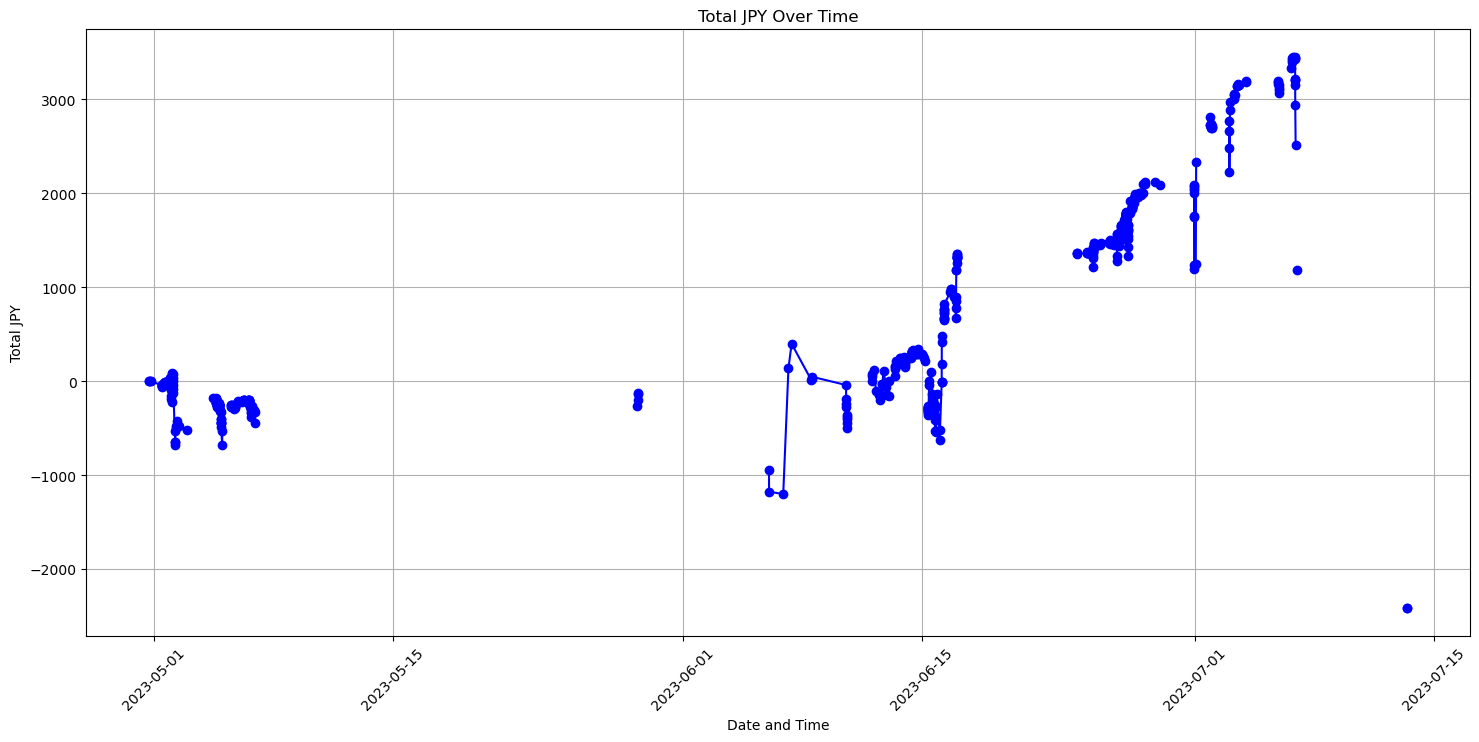

In [136]:
sample_df[['日時','total_jpy']]

# Convert the '日時' column to datetime format
sample_df['日時'] = pd.to_datetime(sample_df['日時'])

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(sample_df['日時'], sample_df['total_jpy'], marker='o', color='b')
plt.title('Total JPY Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Total JPY')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
sample_df[['日時','total_jpy']]

In [134]:
# sample_df.to_csv('2023_trading_report2.csv',index = False)

In [102]:
# Reload the CSV file into a DataFrame
# btc_trading_df = pd.read_csv("/workspace/gmo_drl/2023_trading_report_sample.csv")
btc_trading_df = sample_df

# Filter for purchase and sale transactions
purchases_df = btc_trading_df[(btc_trading_df['精算区分'] == '取引所現物取引') & (btc_trading_df['売買区分'] == '買')]
sales_df = btc_trading_df[(btc_trading_df['精算区分'] == '取引所現物取引') & (btc_trading_df['売買区分'] == '売')]

# Create empty lists to store the results
purchase_dates = []
sale_dates = []
purchase_prices = []
sale_prices = []
profits_or_losses = []

# Create a copy of the purchases and sales DataFrames to modify while iterating
remaining_purchases = purchases_df.copy()
remaining_sales = sales_df.copy()

# Iterate over each purchase
for _, purchase_row in purchases_df.iterrows():
    # Find the next sale after this purchase
    next_sale = remaining_sales[remaining_sales['日時'] > purchase_row['日時']].head(1)
    
    # If there's no corresponding sale, we can't evaluate this purchase
    if next_sale.empty:
        continue

    # Calculate the profit or loss for this pair of transactions
    profit_or_loss = -next_sale['日本円受渡金額'].values[0] - purchase_row['日本円受渡金額']

    # Store the results
    purchase_dates.append(purchase_row['日時'])
    sale_dates.append(next_sale['日時'].values[0])
    purchase_prices.append(purchase_row['日本円受渡金額'])
    sale_prices.append(-next_sale['日本円受渡金額'].values[0])  # negate to get the positive sale value
    profits_or_losses.append(profit_or_loss)

    # Remove the used sale from the remaining sales
    remaining_sales = remaining_sales.drop(next_sale.index)

# Create a DataFrame to display the results
evaluation_df = pd.DataFrame({
    '購入日時': purchase_dates,
    '売却日時': sale_dates,
    '購入価格': purchase_prices,
    '売却価格': sale_prices,
    '利益/損失': profits_or_losses
})

evaluation_df

,購入日時,売却日時,購入価格,売却価格,利益/損失
0,2023/04/30 17:34,2023/05/01 11:47,-401,-1964,-1563
1,2023/04/30 17:46,2023/05/01 12:38,-400,-1572,-1172
2,2023/04/30 18:25,2023/05/01 14:08,-798,-393,405
3,2023/04/30 19:47,2023/05/01 14:08,-799,-393,406
4,2023/05/01 11:14,2023/05/01 14:14,-1181,-1179,2
5,2023/05/01 11:24,2023/05/01 15:49,-394,-2752,-2358
6,2023/05/01 11:28,2023/05/01 16:05,-1962,-3933,-1971
7,2023/05/01 11:50,2023/05/01 16:06,-1177,-787,390
8,2023/05/01 11:50,2023/05/01 16:06,-1961,-393,1568
9,2023/05/01 12:04,2023/05/01 23:06,-1958,-1961,-3


In [103]:
evaluation_df['利益/損失'].sum()

-21038

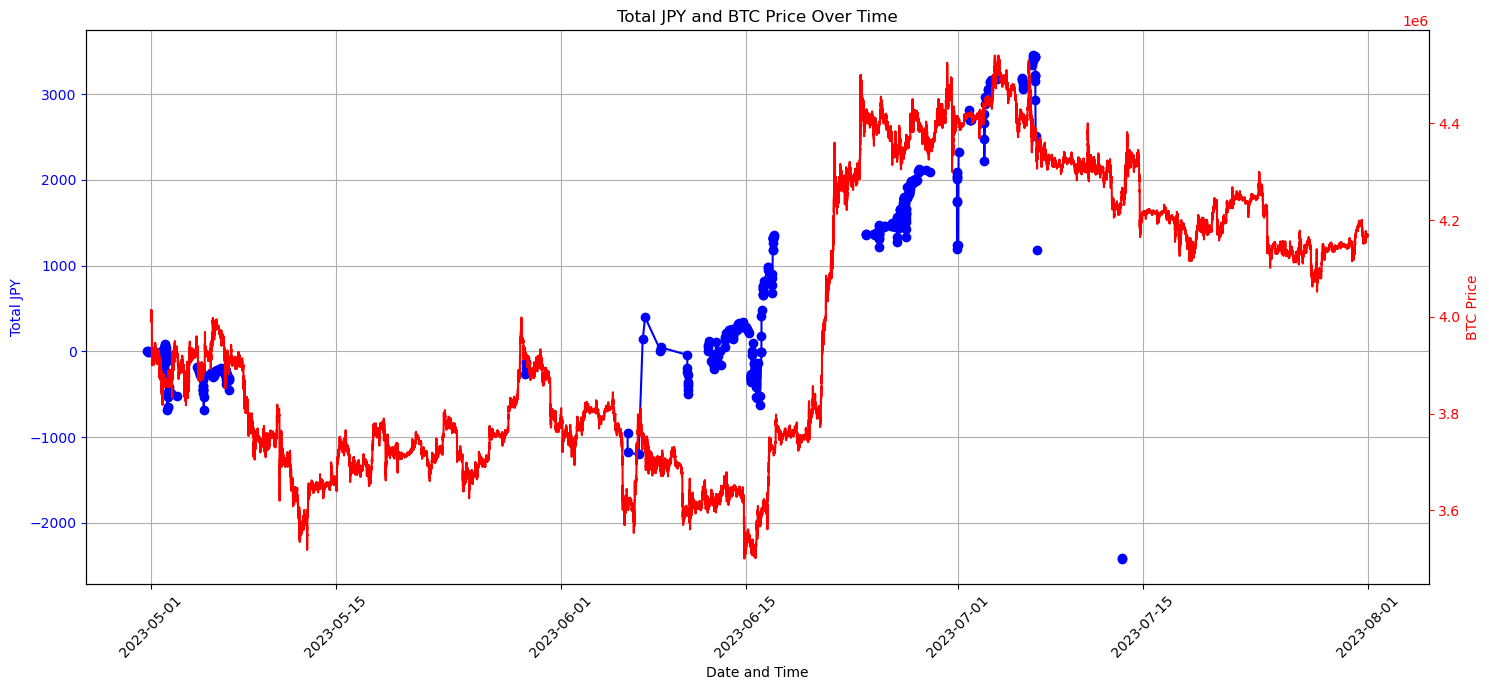

In [173]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading the data
sample_df = pd.read_csv('/workspace/gmo_drl/2023_trading_report2.csv')
btc_data_may = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_5.csv')
btc_data_june = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_6.csv')
btc_data_july = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_7.csv')

# Merging the BTC data
btc_data = pd.concat([btc_data_may, btc_data_june, btc_data_july])

# Convert the '日時' columns to datetime format
sample_df['日時'] = pd.to_datetime(sample_df['日時'])
btc_data['timestamp'] = pd.to_datetime(btc_data['timestamp'])

# Plotting again
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting the sample_df data
ax1.plot(sample_df['日時'], sample_df['total_jpy'], marker='o', color='b', label="Trading Total JPY")
ax1.set_title('Total JPY and BTC Price Over Time')
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Total JPY', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True, which='both', axis='both')
plt.xticks(rotation=45)

# Creating the second y-axis for the BTC price
ax2 = ax1.twinx()
ax2.plot(btc_data['timestamp'], btc_data['price'], color='r', label="BTC Price")
ax2.set_ylabel('BTC Price', color='r')
ax2.tick_params('y', colors='r')

plt.tight_layout()
plt.show()

In [294]:
len(df)

35269

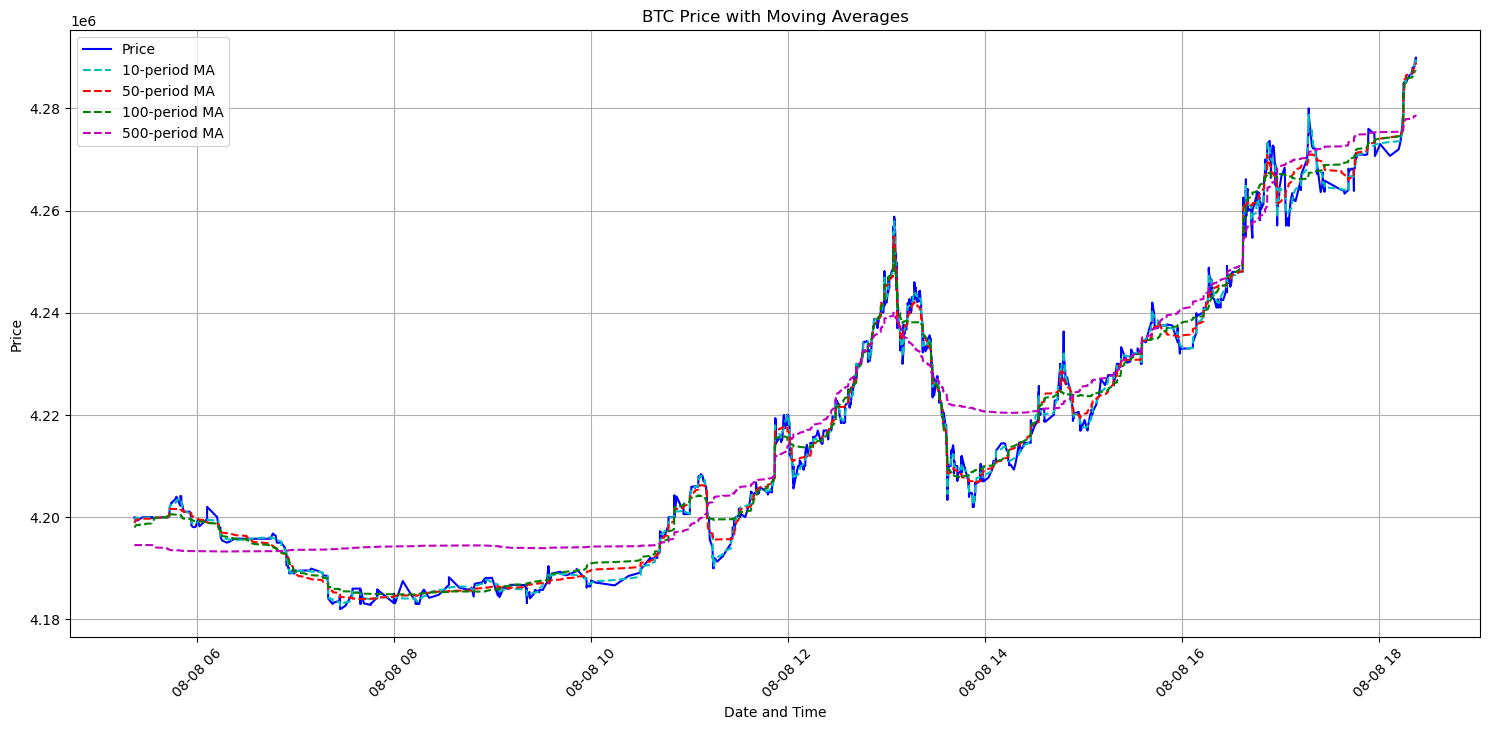

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data again and process
df5 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_5.csv')
df6 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_6.csv')
df7 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_7.csv')
df8 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_8.csv')

# Concatenate the dataframes
df = pd.concat([df8])


# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by date
df = df.sort_values(by='timestamp')

window0 = 10
window1 = 50
window2 = 100
window3 = 500

# Calculate moving averages
df[f'ma{window0}'] = df['price'].rolling(window=window0, center=True).mean()
df[f'ma{window1}'] = df['price'].rolling(window=window1, center=True).mean()
df[f'ma{window2}'] = df['price'].rolling(window=window2, center=True).mean()
df[f'ma{window3}'] = df['price'].rolling(window=window3, center=True).mean()

df = df.iloc[20000:22500]


# Plotting
plt.figure(figsize=(15, 7))
plt.plot(df['timestamp'], df['price'], label='Price', color='b')
plt.plot(df['timestamp'], df[f'ma{window0}'], label=f'{window0}-period MA', color='c', linestyle='--')
plt.plot(df['timestamp'], df[f'ma{window1}'], label=f'{window1}-period MA', color='r', linestyle='--')
plt.plot(df['timestamp'], df[f'ma{window2}'], label=f'{window2}-period MA', color='g', linestyle='--')
plt.plot(df['timestamp'], df[f'ma{window3}'], label=f'{window3}-period MA', color='m', linestyle='--')

plt.title('BTC Price with Moving Averages')
plt.xlabel('Date and Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

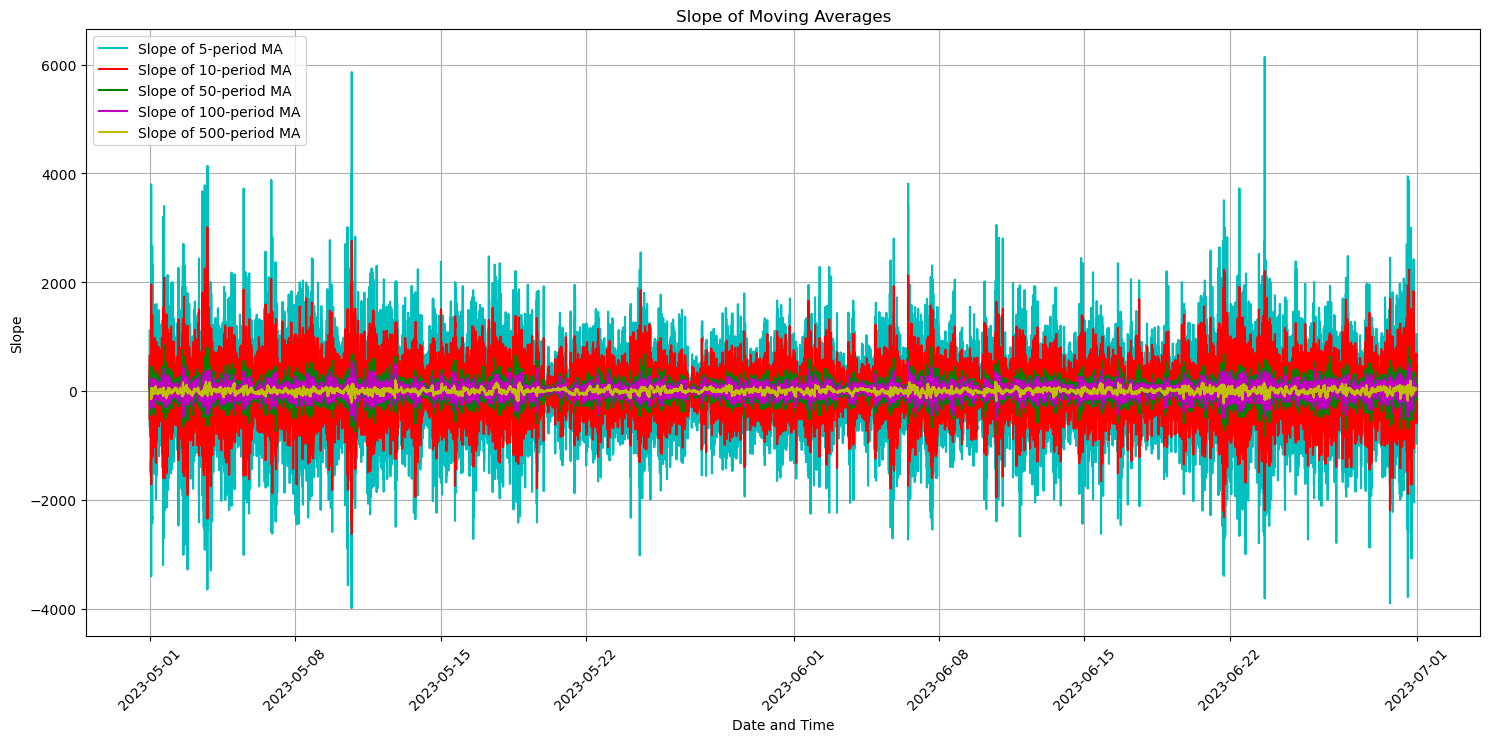

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# df_all = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC.csv')

# Load the data again and process
df5 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_5.csv')
df6 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_6.csv')
df7 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_7.csv')
df8 = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_8.csv')

# Concatenate the dataframes
df = pd.concat([df5,df6])

show_slope(df)

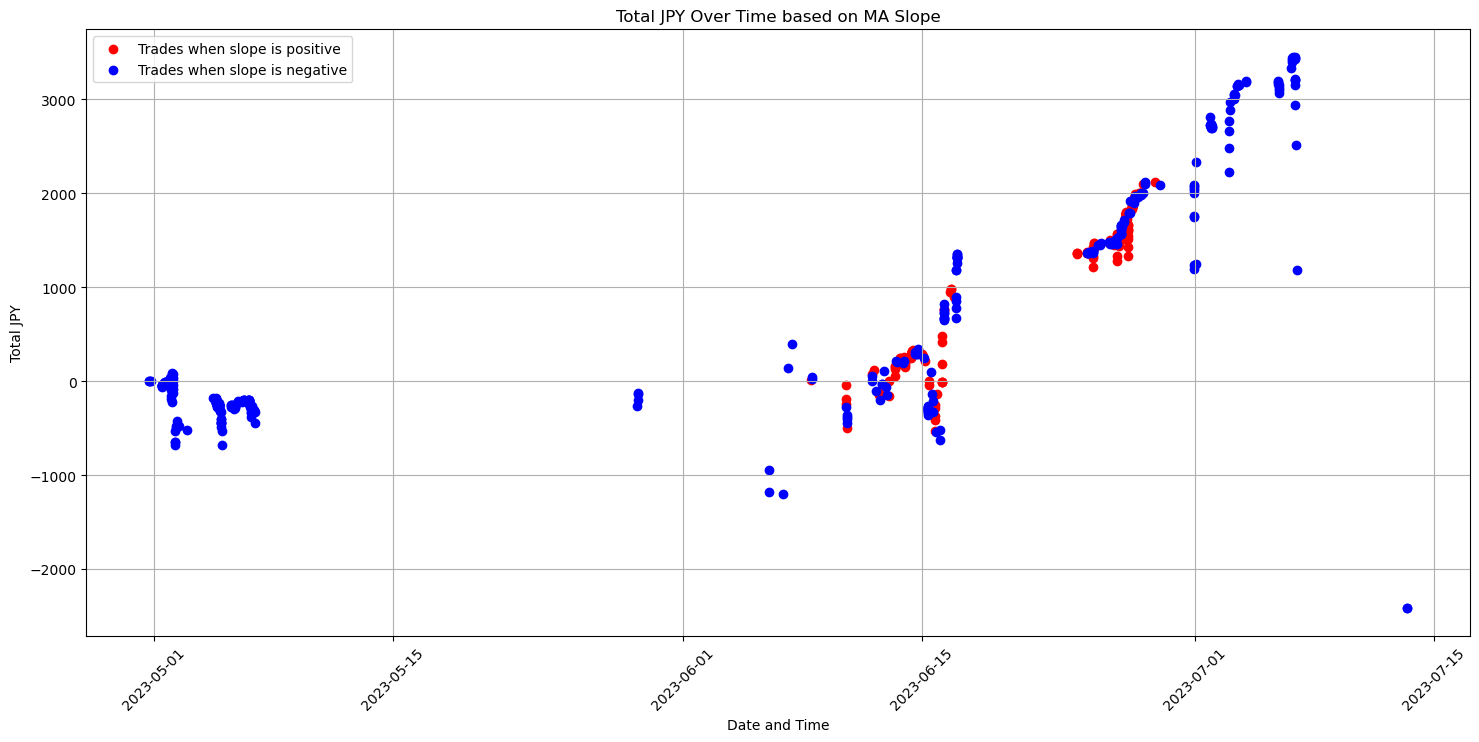

In [81]:
# Load the trading report
trading_df = pd.read_csv('/workspace/gmo_data/gmo_drl/2023_trading_report2.csv')
trading_df['日時'] = pd.to_datetime(trading_df['日時'])

# Merge the trading data with the df on the timestamp to get the corresponding slope values
merged_df = pd.merge_asof(trading_df.sort_values('日時'), 
                          df[['timestamp', 'slope_ma100']].sort_values('timestamp'), 
                          left_on='日時', 
                          right_on='timestamp', 
                          direction='nearest')

# Determine the color based on the slope value
merged_df['color'] = merged_df['slope_ma100'].apply(lambda x: 'red' if x > 0 else 'blue')

merged_df = merged_df[(merged_df['timestamp'] >= '2023-06-08') & (merged_df['timestamp'] <= '2023-06-30')]
merged_df

# Plotting
plt.figure(figsize=(15, 7))

# Plot only the points based on the color without connecting lines
for color in ['red', 'blue']:
    subset = merged_df[merged_df['color'] == color]
    plt.scatter(subset['日時'], subset['total_jpy'], marker='o', color=color, label=f'Trades when slope is {"positive" if color == "red" else "negative"}')

plt.title('Total JPY Over Time based on MA Slope')
plt.xlabel('Date and Time')
plt.ylabel('Total JPY')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [100]:
def show_ma(df, *args, ma=True, color=False):
    import matplotlib.colors as mcolors
    # Convert the 'timestamp' column to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Sort by date
    df = df.sort_values(by='timestamp')

    # Plotting
    plt.figure(figsize=(15, 7))
    
    # Iterate over each window value provided in args
    for window in args:
        # Calculate moving averages
        df[f'ma{window}'] = df['price'].rolling(window=window, center=True).mean()
        
        # Determine which data to plot based on the ma argument
        if ma:  # Plot moving averages
            # Calculate the slope for coloring
            df[f'slope_ma{window}'] = df[f'ma{window}'].diff()
            
            if color:
                colors = ['red' if x > 0 else 'blue' for x in df[f'slope_ma{window}']]
                plt.scatter(df['timestamp'], df[f'ma{window}'], c=colors, s=1, label=f'{window}-period MA')
            else:
                plt.plot(df['timestamp'], df[f'ma{window}'], label=f'{window}-period MA')
        else:  # Plot the slope of the moving averages
            df[f'slope_ma{window}'] = df[f'ma{window}'].diff()
            plt.plot(df['timestamp'], df[f'slope_ma{window}'], label=f'Slope of {window}-period MA')
        

    if ma:
        plt.title('Moving Averages with Slope Color' if color else 'Moving Averages')
        plt.ylabel('Moving Average')
    else:
        plt.title('Slope of Moving Averages')
        plt.ylabel('Slope')
        
    plt.xlabel('Date and Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

    return df
# Test the function with the MA graph with colors
# show_ma(trading_hist, 5000, ma=True, color=True)


# Test the function with the slope graph
# show_ma(trading_hist, 10000, ma=True)
# show_ma(trading_hist, 10000, ma=False)

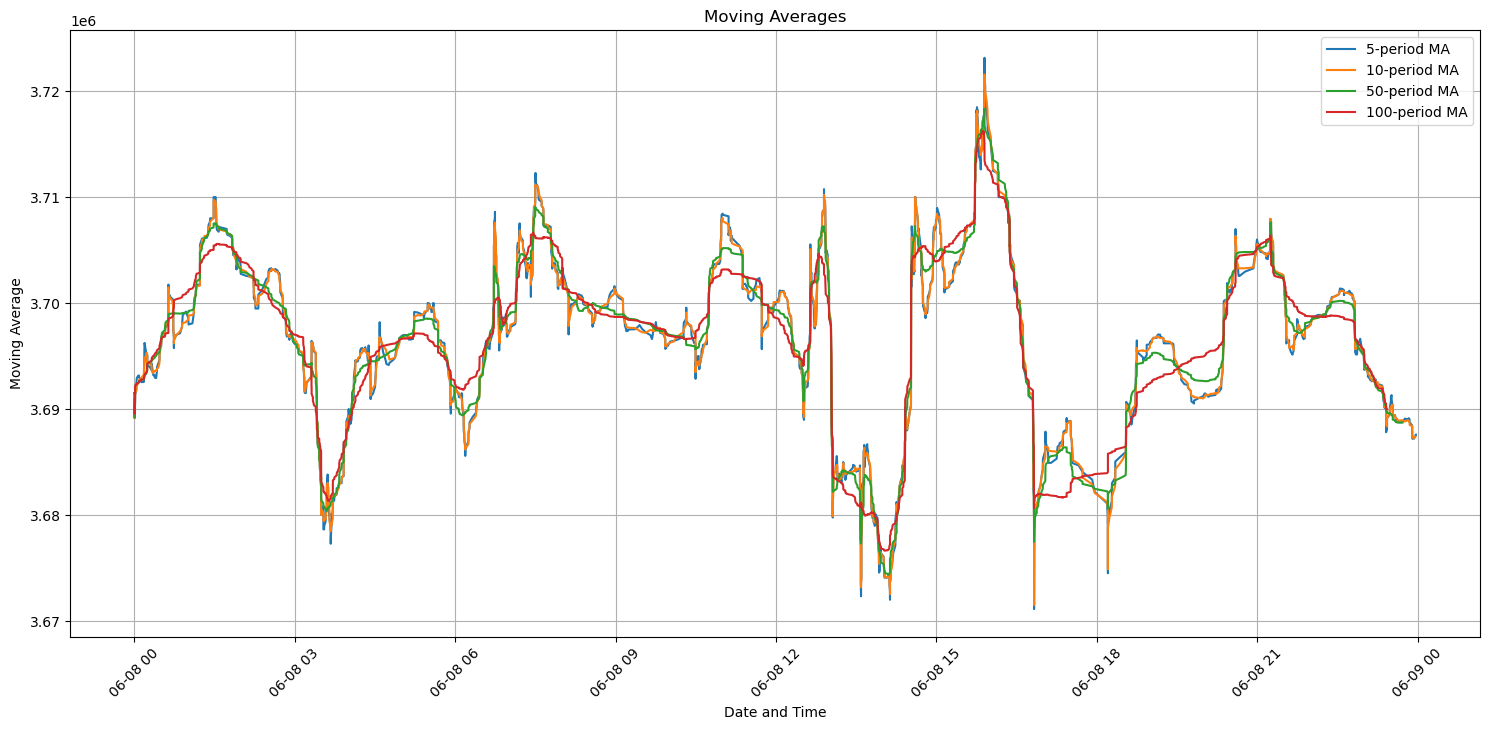

,symbol,side,size,price,timestamp,ma5,ma10,ma50,ma100,ma500,slope_ma5,slope_ma10,slope_ma50,slope_ma100,slope_ma500,month,year
35176,BTC,SELL,0.0013,3692700.0,2023-06-08 00:00:01.412,NaN,NaN,NaN,NaN,3690409.588,NaN,NaN,NaN,NaN,41.722,6,2023
35177,BTC,SELL,0.0006,3691200.0,2023-06-08 00:00:01.412,NaN,NaN,NaN,NaN,3690451.588,NaN,NaN,NaN,NaN,42.000,6,2023
35178,BTC,SELL,0.0001,3691200.0,2023-06-08 00:00:01.417,3691500.0,NaN,NaN,NaN,3690494.186,NaN,NaN,NaN,NaN,42.598,6,2023
35179,BTC,SELL,0.0001,3691200.0,2023-06-08 00:00:01.775,3691200.0,NaN,NaN,NaN,3690538.678,-300.0,NaN,NaN,NaN,44.492,6,2023
35180,BTC,SELL,0.0001,3691200.0,2023-06-08 00:00:01.882,3691200.0,NaN,NaN,NaN,3690582.920,0.0,NaN,NaN,NaN,44.242,6,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38597,BTC,BUY,0.0004,3687500.0,2023-06-08 23:57:13.453,3687498.4,3687389.3,NaN,NaN,3692602.586,148.2,19.8,NaN,NaN,3.250,6,2023
38598,BTC,BUY,0.0100,3687648.0,2023-06-08 23:57:57.202,3687538.0,NaN,NaN,NaN,3692605.836,39.6,NaN,NaN,NaN,3.250,6,2023
38599,BTC,BUY,0.0150,3687942.0,2023-06-08 23:57:57.202,3687577.6,NaN,NaN,NaN,3692609.088,39.6,NaN,NaN,NaN,3.252,6,2023
38600,BTC,BUY,0.0050,3687399.0,2023-06-08 23:59:38.236,NaN,NaN,NaN,NaN,3692614.262,NaN,NaN,NaN,NaN,5.174,6,2023


In [102]:
import pandas as pd

df = pd.read_csv('/workspace/gmo_data/historical_BTC/BTC_2023/BTC_2023_6.csv')
df = df[(df['timestamp'] >= '2023-06-08') & (df['timestamp'] <= '2023-06-09')]

show_ma(df,5,10,50,100,color=False)
# show_ma(df,50,color=True)



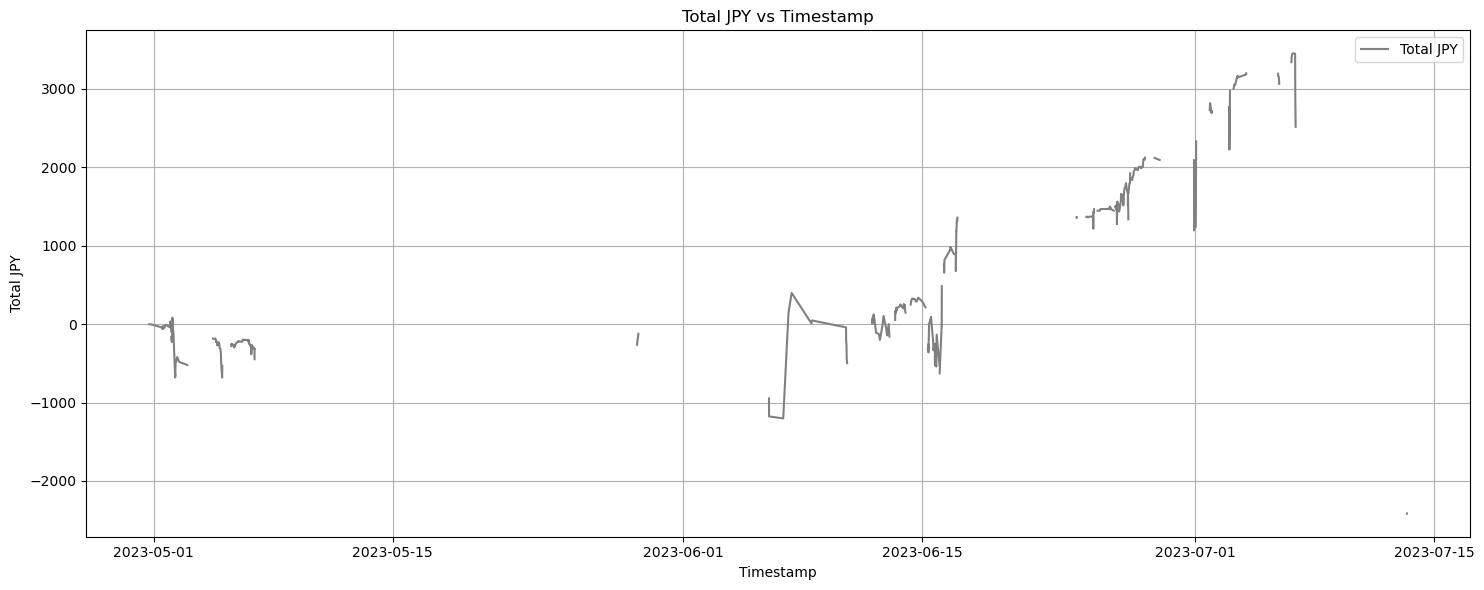

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルを読み込む
trading_hist = pd.read_csv('/workspace/gmo_data/gmo_drl/2023_trading_hist.csv')
trading_report = pd.read_csv('/workspace/gmo_data/gmo_drl/2023_trading_report2.csv')

# データの先頭を確認
trading_hist.head(), trading_report.head()


# '日時'カラムをdatetime型に変換
trading_report['日時'] = pd.to_datetime(trading_report['日時'])

# 折れ線グラフを描画
plt.figure(figsize=(15, 6))
plt.plot(trading_report['日時'], trading_report['total_jpy'], label="Total JPY", linestyle="-", color="grey")
plt.title('Total JPY vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total JPY')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


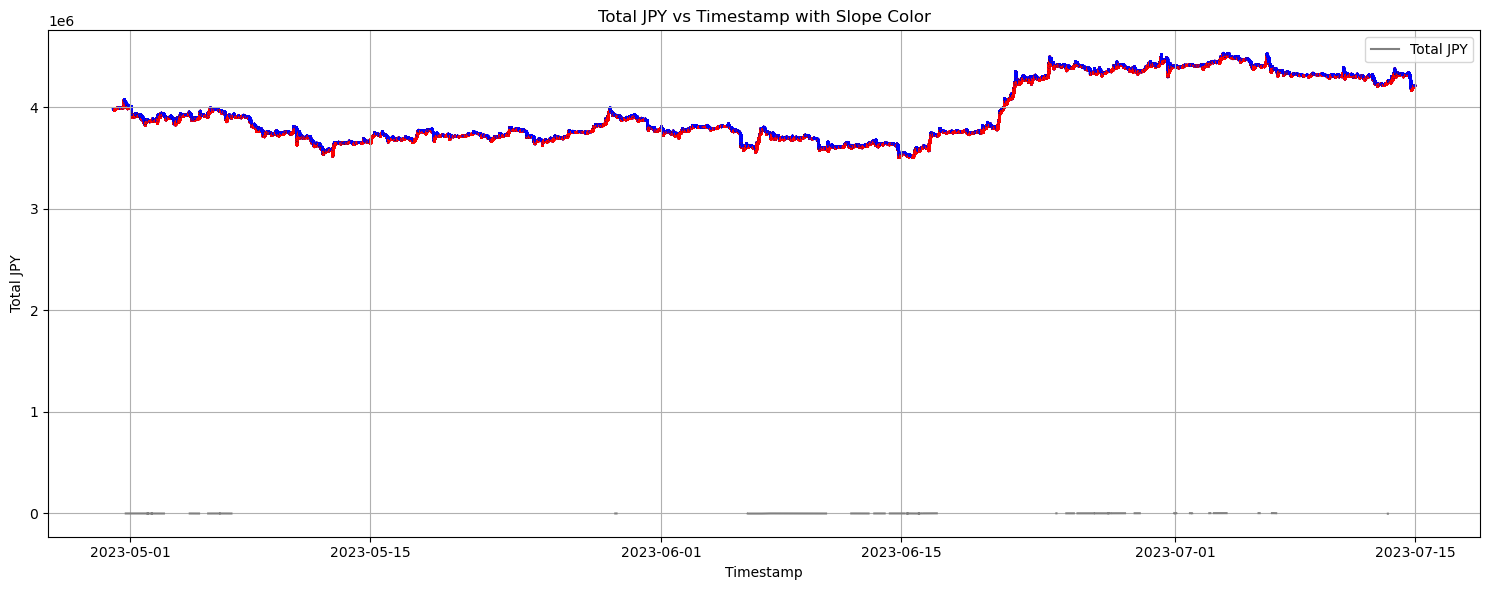

In [59]:
# 'timestamp'カラムをdatetime型に変換
trading_hist['timestamp'] = pd.to_datetime(trading_hist['timestamp'])

# slope100の正負に基づいて色を指定する
colors = trading_hist['slope_ma100'].apply(lambda x: 'red' if x > 0 else 'blue')

plt.figure(figsize=(15, 6))
plt.scatter(trading_hist['timestamp'], trading_hist['ma100'], c=colors, s=1)
plt.plot(trading_report['日時'], trading_report['total_jpy'], label="Total JPY", linestyle="-", color="grey")
plt.title('Total JPY vs Timestamp with Slope Color')
plt.xlabel('Timestamp')
plt.ylabel('Total JPY')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()